In [3]:
from   sklearn.neighbors       import KNeighborsRegressor
from   sklearn.model_selection import GridSearchCV
from   sklearn.model_selection import cross_val_score
from   sklearn                 import metrics
import pandas                  as     pd
import numpy                   as     np
import seaborn                 as     sns
import matplotlib.pyplot       as     plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
olympics_all = pd.read_csv(r'C:\Users\USER\Desktop\DS_python\CP4\CP4\OlympicsData\olympics_all.csv')

In [5]:
X=olympics_all.drop(['NOC', 'country','Gold','Silver','Bronze', 'Medals','GDP_Per_Capita'],axis=1)
y=olympics_all[['Year','Gold','Silver','Bronze', 'Medals']]
print(X.shape)
print(y.shape)

(544, 10)
(544, 5)


In [6]:
#Splitting data 

X_trn = X[X['Year']<2016]
X_tst = X[X['Year'] == 2016]

y_trn = y[y['Year'] < 2016]
y_tst =  y[y['Year'] == 2016]

X_train = X_trn.drop(['Year'],axis=1)
X_test  = X_tst.drop(['Year'],axis=1)
print(X_train.shape)
print(X_test.shape)

y_train = y_trn
y_test =  y_tst
print(y_train.shape)
print(y_test.shape)

(460, 9)
(84, 9)
(460, 5)
(84, 5)


In [34]:
# Create KNN regression objects
knn_gold   = KNeighborsRegressor()
knn_silver = KNeighborsRegressor()
knn_bronze = KNeighborsRegressor()

# Train the models using the training sets
knn_gold.fit(  X_train, y_train['Gold'])
knn_silver.fit(X_train, y_train['Silver'])
knn_bronze.fit(X_train, y_train['Bronze'])

KNeighborsRegressor()

In [9]:
#Testing the model

y_pred_Gold    = knn_gold.predict(X_test)
y_pred_Gold    = y_pred_Gold .astype('int64')
y_pred_Gold    = y_pred_Gold .clip(min=0)

y_pred_Silver   = knn_silver.predict(X_test)
y_pred_Silver   = y_pred_Silver.astype('int64')
y_pred_Silver   = y_pred_Silver.clip(min=0)


y_pred_Bronze   = knn_bronze.predict(X_test)
y_pred_Bronze   = y_pred_Bronze.astype('int64')
y_pred_Bronze   = y_pred_Bronze.clip(min=0)

In [32]:
#Applying k-fold cross_validation

accuracy_gold = cross_val_score(estimator=knn_gold,X=X_train,y=y_train['Gold'],cv=4)
accuracy_silver = cross_val_score(estimator=knn_silver,X=X_train,y=y_train['Silver'],cv=4)
accuracy_bronze = cross_val_score(estimator=knn_bronze,X=X_train,y=y_train['Bronze'],cv=4)

print("Gold Accuracy:", accuracy_gold)
print("Silver Accuracy:",accuracy_silver)
print("Bronze Accuracy:",accuracy_bronze)

print()
print("Gold Accuracy  :", (accuracy_gold.mean()*100).round(3), ' and Std Dev:',accuracy_gold.std().round(2))
print("Silver Accuracy:", (accuracy_silver.mean()*100).round(3), ' and Std Dev:',accuracy_silver.std().round(2))
print("Bronze Accuracy:", (accuracy_bronze.mean()*100).round(3), ' and Std Dev:',accuracy_bronze.std().round(2))
print()

Gold Accuracy: [0.19866882 0.3341077  0.29327798 0.49511195]
Silver Accuracy: [0.24488393 0.3053733  0.53980013 0.53733057]
Bronze Accuracy: [0.29266539 0.34167933 0.368323   0.41341877]

Gold Accuracy  : 33.029  and Std Dev: 0.11
Silver Accuracy: 40.685  and Std Dev: 0.13
Bronze Accuracy: 35.402  and Std Dev: 0.04



In [30]:
%%time
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,1,3,14,15,16]}
grid = GridSearchCV(estimator=knn_gold,param_grid=params,cv=4)
grid.fit(X_train,y_train['Gold'])
best_accuracy  = grid.best_score_
best_parameter = grid.best_params_
print("Best Accuracy for Gold:",best_accuracy)
print("Best Parameters for Gold:",best_parameter)
print("Best Estimator:", grid.best_estimator_)
print()


params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,1,3,14,15,16]}
grid = GridSearchCV(estimator=knn_silver,param_grid=params,cv=4)
grid.fit(X_train,y_train['Silver'])
best_accuracy  = grid.best_score_
best_parameter = grid.best_params_
print("Best Accuracy for Silver:",best_accuracy)
print("Best Parameters for Silver:",best_parameter)
print("Best Estimator(Silver):", grid.best_estimator_)
print()


params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,1,3,14,15,16]}
grid = GridSearchCV(estimator=knn_bronze,param_grid=params,cv=4)
grid.fit(X_train,y_train['Bronze'])
best_accuracy  = grid.best_score_
best_parameter = grid.best_params_
print("Best Accuracy for Bronze:",best_accuracy)
print("Best Parameters for Bronze:",best_parameter)
print("Best Estimator(Bronze):", grid.best_estimator_)

Best Accuracy for Gold: 0.4185262456131717
Best Parameters for Gold: {'n_neighbors': 9}
Best Estimator: KNeighborsRegressor(n_neighbors=9)

Best Accuracy for Silver: 0.4556837401942799
Best Parameters for Silver: {'n_neighbors': 7}
Best Estimator(Silver): KNeighborsRegressor(n_neighbors=7)

Best Accuracy for Bronze: 0.43590060817515475
Best Parameters for Bronze: {'n_neighbors': 10}
Best Estimator(Bronze): KNeighborsRegressor(n_neighbors=10)
Wall time: 12.9 s


In [ ]:
data = pd.read_csv(r'C:\Users\USER\Desktop\DS_python\CP4\CP4\OlympicsData\07_tokyo2020.csv')
data

In [13]:
#Prediction
data = pd.read_csv(r'C:\Users\USER\Desktop\DS_python\CP4\CP4\OlympicsData\07_tokyo2020.csv')

tokyo = data[['Population','GDP','Home_Field','Athletes','Athletes_w','Sports','Sports_w','Events','Events_w']]

PGold   = knn_gold.predict(tokyo)
PGold   = PGold.astype('int64')
PGold   = PGold.clip(min=0)
                                      
PSilver  = knn_silver.predict(tokyo)
PSilver  = PSilver.astype('int64')
PSilver  = PSilver.clip(min=0)
                                    
PBronze  = knn_bronze.predict(tokyo)
PBronze  = PSilver.astype('int64')
PBronze  = PSilver.clip(min=0)

In [14]:
#tokyo = pd.read_csv(r"C:\Users\USER\Desktop\DS_python\CP4\CP4\07_tokyo2020.csv")

#select only wanted columns
tokyo2020_prediction = data[['NOC','country']]


tokyo2020_prediction['PGold']   = PGold.T
tokyo2020_prediction['PSilver'] = PSilver.T
tokyo2020_prediction['PBronze'] = PBronze.T

tokyo2020_prediction['Total']  =  tokyo2020_prediction['PGold'] + tokyo2020_prediction['PSilver'] + tokyo2020_prediction['PBronze']
tokyo2020_predicted = tokyo2020_prediction.sort_values(by = 'Total', ascending = False)

tokyo2020_predicted.index = np.arange(1, len(tokyo2020_predicted)+1)
tokyo2020_predicted.head(20)

,NOC,country,PGold,PSilver,PBronze,Total
1,CHN,China,38,31,31,100
2,USA,USA,38,31,31,100
3,KOR,South Korea,19,14,14,47
4,ITA,Italy,19,14,14,47
5,GER,Germany,17,14,14,45
6,GBR,UK,15,14,14,43
7,FRA,France,15,14,14,43
8,IND,India,15,13,13,41
9,JPN,Japan,16,10,10,36
10,UAE,United Arab Emirates,9,11,11,31


In [22]:

print("R2(Gold)    = ", metrics.r2_score(y_test['Gold'],y_pred_Gold))
print("MSE(Gold)   = ", metrics.mean_squared_error(y_test['Gold'],y_pred_Gold))
print("MAE(Gold)   = ", metrics.mean_absolute_error(y_test['Gold'],y_pred_Gold))
print()


print("R2(Silver)  = ", metrics.r2_score(y_test['Silver'],y_pred_Silver))
print("MSE(Silver) = ", metrics.mean_squared_error(y_test['Silver'],y_pred_Silver))
print("MAE(Silver) = ", metrics.mean_absolute_error(y_test['Silver'],y_pred_Silver))
print()


print("R2(Bronze)  = ", metrics.r2_score(y_test['Bronze'],y_pred_Bronze))
print("MSE(Bronze) = ", metrics.mean_squared_error(y_test['Bronze'],y_pred_Bronze))
print("MAE(Bronze) = ", metrics.mean_absolute_error(y_test['Bronze'],y_pred_Bronze))

R2(Gold)    =  0.6342031948428725
MSE(Gold)   =  17.547619047619047
MAE(Gold)   =  2.9285714285714284

R2(Silver)  =  0.505264779906518
MSE(Silver) =  16.38095238095238
MAE(Silver) =  2.857142857142857

R2(Bronze)  =  0.6179659266907589
MSE(Bronze) =  15.416666666666666
MAE(Bronze) =  2.630952380952381


In [31]:
# Evaluate the model's training score and test score
print("KNN training score(Gold) = {:.2f}".format(knn_gold.score(X_train, y_train['Gold'])))
print("KNN test score(Gold)     = {:.2f}".format(knn_gold.score(X_test, y_test['Gold'])))
print()

print("KNN training score(Silver) = {:.2f}".format(knn_gold.score(X_train, y_train['Silver'])))
print("KNN test score(Silver)     = {:.2f}".format(knn_gold.score(X_test, y_test['Silver'])))
print()

print("KNN training score(Bronze) = {:.2f}".format(knn_gold.score(X_train, y_train['Bronze'])))
print("KNN test score(Bronze)     = {:.2f}".format(knn_gold.score(X_test, y_test['Bronze'])))

KNN training score(Gold) = 0.59
KNN test score(Gold)     = 0.63

KNN training score(Silver) = 0.56
KNN test score(Silver)     = 0.43

KNN training score(Bronze) = 0.53
KNN test score(Bronze)     = 0.63


In [ ]:
param={
'bootstrap': [True,False],
    'max_depth': [1,2,3,4],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 150, 200, 250,300],
    'criterion' : ['mse', 'mae'],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid = GridSearchCV(estimator = rf_gold, param_grid = param, 
                          cv = 3, verbose = 2)
grid.fit(X_train,y_train['Gold'])

print("Best Accuracy:",grid.best_score_)
print("Best Parameters:",grid.best_params_)
#print("Best Estimator:", grid.best_estimator_)

In [39]:
parameters = {
    'n_estimators': [100, 150, 200, 250, 300, 350,400,500,600,700,800,900,1000],
    'max_depth': [1,2,3,4,5,6],
}

grid = GridSearchCV(rf_gold, parameters)
grid.fit(X_train, y_train['Gold'])

print("Best Accuracy:",grid.best_score_)
print("Best Parameters:",grid.best_params_)

Best Accuracy: 0.8968046450285907
Best Parameters: {'max_depth': 4, 'n_estimators': 400}


<function matplotlib.pyplot.show(close=None, block=None)>

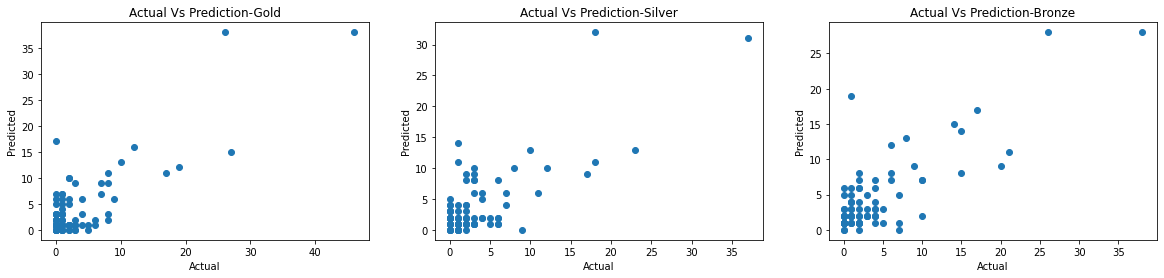

In [19]:
#Test set - Actual vs Prediction

plt.figure(figsize =(20,4))
plt.subplot(1,3,1)
plt.scatter(y_test['Gold'],y_pred_Gold)
plt.title("Actual Vs Prediction-Gold")
plt.xlabel("Actual")
plt.ylabel("Predicted")


plt.subplot(1,3,2)
plt.scatter(y_test['Silver'],y_pred_Silver)
plt.title("Actual Vs Prediction-Silver")
plt.xlabel("Actual")
plt.ylabel("Predicted")


plt.subplot(1,3,3)
plt.scatter(y_test['Bronze'],y_pred_Bronze)
plt.title("Actual Vs Prediction-Bronze")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show

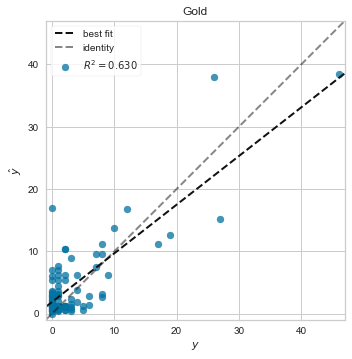

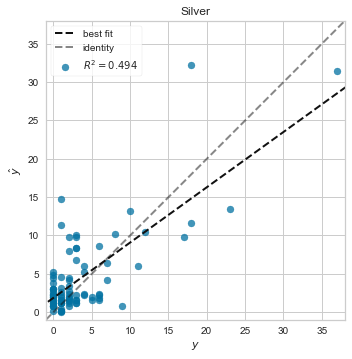

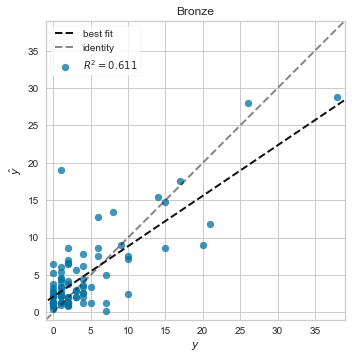

<AxesSubplot:title={'center':'Bronze'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [21]:
from yellowbrick.regressor import PredictionError


visualizer = PredictionError(knn_gold, title = 'Gold')
visualizer.fit(X_train,y_train['Gold'])
visualizer.score(X_test,y_test['Gold'])
visualizer.poof()

visualizer = PredictionError(knn_silver, title = 'Silver')
visualizer.fit(X_train,y_train['Silver'])
visualizer.score(X_test,y_test['Silver'])
visualizer.poof()

visualizer = PredictionError(knn_bronze, title = 'Bronze')
visualizer.fit(X_train,y_train['Bronze'])
visualizer.score(X_test,y_test['Bronze'])
visualizer.poof()

In [ ]:
#feature importance


feature_importance = np.array(rf_gold.feature_importances_)
feature_names = np.array(X_train.columns)
feat_imp = pd.DataFrame({'feature_names':feature_names,'feature_importance':feature_importance})
feat_imp_sorted = feat_imp.sort_values('feature_importance', ascending=False)
print(feat_imp_sorted)

In [ ]:
feature_importance = np.array(rf_silver.feature_importances_)
feature_names = np.array(X_train.columns)
feat_imp = pd.DataFrame({'feature_names':feature_names,'feature_importance':feature_importance})
feat_imp_sorted = feat_imp.sort_values('feature_importance', ascending=False)
print(feat_imp_sorted)

In [ ]:
feature_importance = np.array(rf_bronze.feature_importances_)
feature_names = np.array(X_train.columns)
feat_imp = pd.DataFrame({'feature_names':feature_names,'feature_importance':feature_importance})
feat_imp_sorted = feat_imp.sort_values('feature_importance', ascending=False)
print(feat_imp_sorted)